In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error

<br>
<br>

#### 1-1. (미국 보스턴의 주택 가격) 데이터 읽어들이기 & Binary label 만들어주기

In [2]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
# df_data.mean()

In [4]:
# 집값의 평균값이 얼마일까요?

mean_price = df_target[0].mean()
mean_price

22.532806324110698

In [ ]:
# def check_price(x):
#     if x > mean_price:
#         return 1
#     else:
#         return 0

In [7]:
df_target.head(3)

,0
0,24.0
1,21.6
2,34.7


In [9]:
df_target['Label'] = df_target[0].apply(lambda x : 1 if x > mean_price else 0 ) # 새로운 함수를 '적용'해주려면?
df_target.head()

,0,Label
0,24.0,1
1,21.6,0
2,34.7,1
3,33.4,1
4,36.2,1


<br>
<br>

#### 1-2. Dataframe 을 Numpy array (배열, 행렬)로 바꿔주기

In [10]:
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

In [11]:
boston_target

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

<br>
<br>

#### 2. Feature 선택하기

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

In [13]:
boston_data[: , (5, 12)]

(506, 13)

In [14]:
# Use only one feature 

boston_X = boston_data[:,(5, 12)] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_X

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [15]:
boston_Y = boston_target

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [16]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, 
                                                                    boston_Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

In [18]:
model = linear_model.LogisticRegression() # 로지스틱회귀

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [19]:
# Train the model using the training sets

model.fit(x_train, y_train)

LogisticRegression()

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [21]:
x_test[:10]

array([[ 6.333,  7.34 ],
       [ 6.216,  9.53 ],
       [ 6.373, 10.5  ],
       [ 5.349, 19.77 ],
       [ 6.232, 12.34 ],
       [ 5.834,  8.47 ],
       [ 5.905, 11.45 ],
       [ 5.968,  9.29 ],
       [ 4.973, 12.64 ],
       [ 6.405, 10.63 ]])

In [25]:
# 양성/음성 확률을 확인하려면?

# plot roc curve for test set
pred_test = model.predict_proba(x_test) # Predict 'probability'

pred_test[ : , 1 ]

array([7.28272862e-01, 4.85873749e-01, 4.27988734e-01, 5.06602928e-03,
       2.29255701e-01, 4.92193363e-01, 2.31808392e-01, 4.43428414e-01,
       6.21879678e-02, 4.23264212e-01, 6.88990666e-03, 1.14695093e-02,
       3.32658524e-02, 6.80287144e-05, 9.92265881e-01, 9.45071203e-01,
       3.69719853e-01, 9.67378697e-01, 8.86752993e-01, 4.65298369e-01,
       7.58771242e-01, 1.87299131e-01, 1.13240785e-01, 7.70531803e-01,
       2.84155014e-01, 1.45669362e-02, 1.06549575e-01, 3.82467368e-02,
       9.85076036e-01, 3.39238577e-02, 2.55791880e-02, 8.60334271e-02,
       4.24455012e-01, 1.99845259e-01, 5.90644107e-01, 6.64996221e-02,
       5.49309494e-04, 4.60668448e-01, 3.56019882e-02, 2.02516166e-03,
       5.60444575e-01, 7.90233640e-02, 5.12137707e-01, 1.08337737e-02,
       6.60377922e-01, 5.81839880e-01, 4.08132381e-02, 7.68448546e-02,
       5.86975360e-05, 6.33610364e-01, 8.17264175e-02, 1.75812813e-02,
       2.31722228e-01, 9.90780232e-01, 2.17315308e-02, 4.76694016e-02,
      

In [22]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score # accuracy

# 모델 분류의 정확도
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

Accuracy:  0.8223684210526315


<br>
<br>

#### 7. 모델 시각화

In [32]:
for _ in range(5):
    print('hi')

hi
hi
hi
hi
hi


In [26]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) 

roc_auc = auc(fpr, tpr) 

roc_auc

0.891207419297307

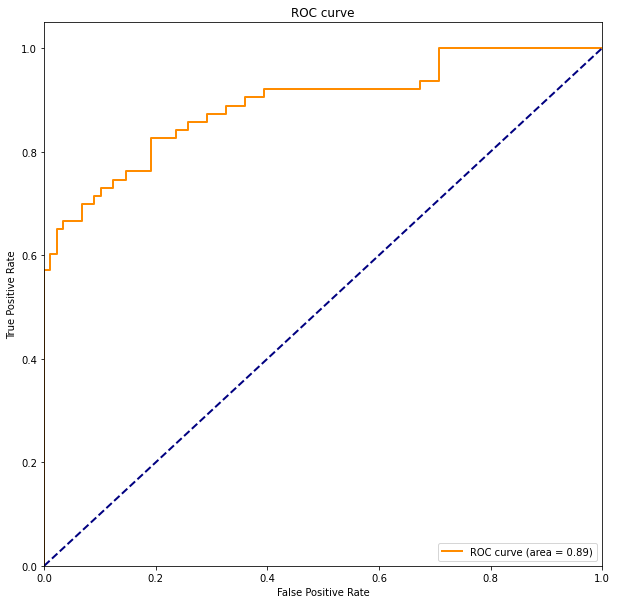

In [33]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8552631578947368


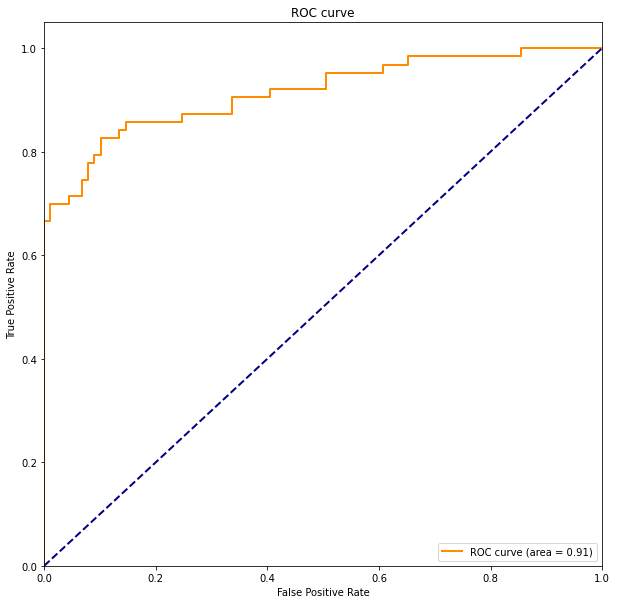

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc

# 1. Prepare the data (array!)
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)
df_target = pd.read_excel('boston_house_target.xlsx')
df_target['Label'] = df_target[0].apply(lambda x: 1 if x > df_target[0].mean() else 0 ) 
boston_data = np.array(df_data)
boston_target = np.array(df_target['Label'])

# 2. Feature selection
boston_X = boston_data[:, 5:13] # 주택당 방 수 & 인구 중 하위 계층 비율 
boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LogisticRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('Accuracy: ', accuracy_score(model.predict(x_test), y_test))

# 7. Visualize the model
pred_test = model.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [ ]:
# 513 